In [6]:
import os
import sys
import random
import math
import re
import time
import numpy as np


import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project


ROOT_DIR = os.path.abspath("../..")

In [7]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

from samples.face import face

%matplotlib inline

In [8]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    

## Configurations

Configurations are defined in face.py

In [9]:
config = face.FaceConfig()
FACE_DIR = os.path.join(ROOT_DIR, "samples/face/face_data")



## Splash (from balloons)


In [13]:
class InferenceConfig(face.FaceConfig):
    # Set batch size to 1
    GPU_COUNT = 1
    IMAGES_PER_GPU =1
    
inference_config = InferenceConfig()
inference_config.display()

model = modellib.MaskRCNN(mode="inference", config=inference_config,
                          model_dir=MODEL_DIR)
# weights_path = model.find_last()
weights_path = os.path.join(MODEL_DIR,'face20200407T2202/mask_rcnn_face_0000.h5')

model.load_weights(weights_path, by_name=True)

img_path = os.path.join(ROOT_DIR, 'samples/face/sample_img1.jpg')

splashed_img_path = face.detect_and_color_splash(model, image_path=img_path, video_path=None)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

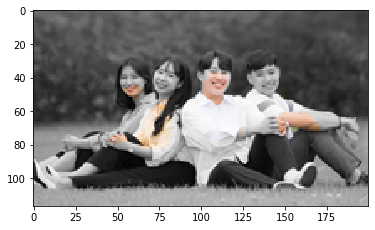

In [14]:
splashed_img_array = face.open_image_as_nparray(splashed_img_path)

plt.imshow(splashed_img_array)



    